# Morphology prediction using abundance data only

In [1]:
import pandas as pd

gene_labels = pd.read_csv('../data/cpg0016/version_2023-06-14/gene_labels.csv')

In [2]:
gene_labels

,Metadata_Symbol,Metadata_NCBI_Gene_ID,Indeterminate,Negative,Positive,gene_label
0,A2M,2,1,1,3,Positive
1,A3GALT2,127550,1,0,4,Positive
2,A4GALT,53947,0,0,5,Positive
3,A4GNT,51146,3,0,3,Indeterminate
4,AACS,65985,1,0,4,Positive
...,...,...,...,...,...,...
7970,ZSCAN32,54925,4,0,1,Indeterminate
7971,ZSCAN4,201516,0,0,3,Positive
7972,ZSCAN5A,79149,0,0,5,Positive
7973,ZSCAN9,7746,0,0,5,Positive


In [5]:
cell_line_df = pd.read_table('../../../data/Human-Protein-Atlas/rna_celline.tsv.gz')
cancer_df = pd.read_table('../../../data/Human-Protein-Atlas/rna_celline_cancer.tsv.zip')

We will grab the `nTPM` and `pTPM` columns from the cell line (filtered for U2OS) and cancer (filtered for Bone cancer) tables:

In [7]:
abundance_df = cell_line_df[cell_line_df['Cell line'] == 'U2OS'].merge(
    cancer_df[cancer_df['Cancer'] == 'Bone cancer'],
    on = ['Gene', 'Gene name'],
    suffixes = ('_U2OS', '_Bone-cancer')
)[['Gene name', 'nTPM_U2OS', 'pTPM_U2OS', 'nTPM_Bone-cancer', 'pTPM_Bone-cancer']]
abundance_df

,Gene name,nTPM_U2OS,pTPM_U2OS,nTPM_Bone-cancer,pTPM_Bone-cancer
0,TSPAN6,22.6,29.4,17.6,20.6
1,TNMD,0.0,0.0,0.1,0.1
2,DPM1,86.1,111.7,85.2,97.0
3,SCYL3,3.2,4.1,5.8,6.9
4,C1orf112,16.0,20.8,17.1,20.1
...,...,...,...,...,...
20157,ENSG00000291313,6.9,8.9,11.1,12.6
20158,ENSG00000291314,0.0,0.0,0.0,0.0
20159,ENSG00000291315,0.6,0.8,0.0,0.0
20160,ENSG00000291316,7.0,9.1,9.1,10.7


Get definitively labeled subset of morphology data

In [8]:
definite_gene_labels = gene_labels[gene_labels.gene_label.isin(['Positive', 'Negative'])]
definite_gene_labels

,Metadata_Symbol,Metadata_NCBI_Gene_ID,Indeterminate,Negative,Positive,gene_label
0,A2M,2,1,1,3,Positive
1,A3GALT2,127550,1,0,4,Positive
2,A4GALT,53947,0,0,5,Positive
4,AACS,65985,1,0,4,Positive
5,AADAC,13,4,0,6,Positive
...,...,...,...,...,...,...
7969,ZSCAN31,64288,0,0,5,Positive
7971,ZSCAN4,201516,0,0,3,Positive
7972,ZSCAN5A,79149,0,0,5,Positive
7973,ZSCAN9,7746,0,0,5,Positive


Check if all symbols in labeled set are covered by the HPA data

In [9]:
definite_gene_labels.Metadata_Symbol.isin(abundance_df['Gene name']).all()

False

How many are we missing?

In [10]:
definite_gene_labels.Metadata_Symbol[~definite_gene_labels.Metadata_Symbol.isin(abundance_df['Gene name'])]

9          AARS
131        ACPP
132        ACPT
208       ADCK3
209       ADCK4
         ...   
7740        ZAK
7765    ZCCHC11
7923     ZNF645
7936     ZNF720
7953      ZNRD1
Name: Metadata_Symbol, Length: 134, dtype: object

For subsequent analysis, we'll use genes that are both labeled and have abundance data.

In [12]:
labeled_df = abundance_df.merge(
    definite_gene_labels[['Metadata_Symbol', 'gene_label']],
    how='inner',
    left_on='Gene name',
    right_on='Metadata_Symbol'
)
labeled_df

,Gene name,nTPM_U2OS,pTPM_U2OS,nTPM_Bone-cancer,pTPM_Bone-cancer,Metadata_Symbol,gene_label
0,DPM1,86.1,111.7,85.2,97.0,DPM1,Positive
1,SCYL3,3.2,4.1,5.8,6.9,SCYL3,Positive
2,FGR,0.0,0.0,0.1,0.1,FGR,Positive
3,FUCA2,50.9,66.3,36.7,42.1,FUCA2,Positive
4,GCLC,30.3,39.5,21.8,25.7,GCLC,Positive
...,...,...,...,...,...,...,...
6860,NPBWR1,0.1,0.2,0.0,0.0,NPBWR1,Positive
6861,UGT1A3,0.0,0.0,0.0,0.0,UGT1A3,Positive
6862,UGT1A5,0.0,0.0,0.0,0.0,UGT1A5,Positive
6863,HOMEZ,1.9,2.5,6.1,7.1,HOMEZ,Positive


Construct vectors for ML

In [14]:
x = labeled_df[['nTPM_U2OS', 'pTPM_U2OS', 'nTPM_Bone-cancer', 'pTPM_Bone-cancer']]
y = labeled_df['gene_label'].map({'Positive': 0, 'Negative': 1})

ML Run

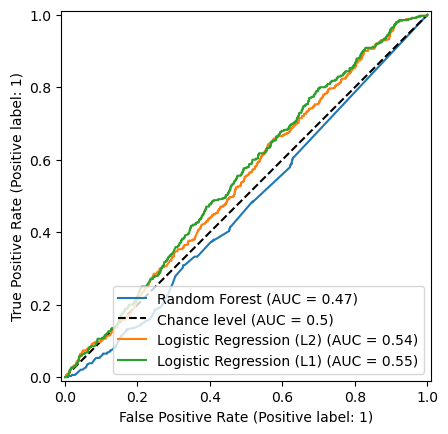

In [15]:
# Defining inputs for machine learning models
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import roc_curve, auc, accuracy_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize, LabelEncoder
from matplotlib.pyplot import subplots

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression (L2)': LogisticRegression(penalty='l2'),
    'Logistic Regression (L1)': LogisticRegression(penalty='l1', solver='liblinear')
}

cv = StratifiedKFold(n_splits=10, random_state=20240131, shuffle=True)

ax = None

for name, model in models.items():
    probs = cross_val_predict(model, x, y, cv=cv, method='predict_proba')[:, 1]
    fig = RocCurveDisplay.from_predictions(y, probs, name=name, plot_chance_level=(ax is None), ax=ax)
    ax = fig.ax_